In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.preprocessing import scale 

In [2]:
mat = pd.read_csv('mod_mat.csv')

In [3]:
mat.head()

,Unnamed: 0,Id,MSSubClass,MSZoningC (all),MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,LotArea,LotShapeIR2,...,YrSold,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial,SalePrice,WoodDeck,PorchOpenNone,PorchOpenopen
0,1,1032,0.427955,0,0,0,1,0,1.084026,0,...,0.891688,0,0,0,1,0,0.417842,1.043050,0,1
1,2,346,-0.163054,0,0,0,1,0,-0.659691,0,...,-1.367186,0,0,0,1,0,-0.433660,-0.958071,1,0
2,3,1398,0.309753,0,0,0,0,1,-0.756685,0,...,-0.614228,0,0,0,1,0,-0.482341,1.043050,0,0
3,4,1058,0.073350,0,0,0,1,0,2.312957,1,...,0.891688,0,0,0,1,0,0.994195,1.043050,0,1
4,5,386,1.491770,0,0,0,1,0,-2.020583,0,...,1.644646,0,0,0,1,0,0.353483,1.043050,0,1


In [4]:
np.shape(mat)

(1460, 160)

In [5]:
X_wId = mat.drop(['Unnamed: 0','SalePrice'], axis = 1)
X = mat.drop(['Unnamed: 0','SalePrice', 'Id'], axis = 1)
y = np.ravel(mat['SalePrice'])

In [6]:
# Test data
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

0.0952336516634984


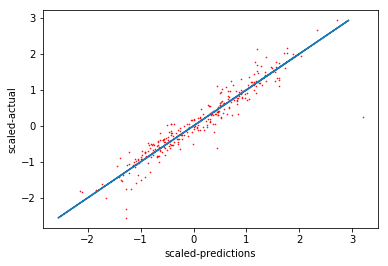

In [7]:
# Lasso
lasso = Lasso(max_iter = 10000, normalize = False)
lassocv = LassoCV(alphas = None, cv = 20, max_iter = 1000000, 
                 normalize = False)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_test, lasso.predict(X_test)))

fig, ax = plt.subplots()
ax.plot(lasso.predict(X_test), y_test, 'ro', markersize = 0.6)
ax.set(xlabel = 'scaled-predictions', ylabel = 'scaled-actual')
ax.plot(y_test, y_test)

In [8]:
# 108 coefficients went to 0
lassocoef = pd.Series(abs(lasso.coef_), index=X.columns)
np.shape(lassocoef[lassocoef.sort_values()> 0])[0]

98

In [9]:
rf = RandomForestRegressor(n_estimators = 1000, max_features = 25, random_state = 42)

In [11]:
rf = rf.fit(X_train, y_train)

In [12]:
cross_val_acc = cross_val_score(rf, X_train, y_train, 
                        scoring = 'neg_mean_squared_error', cv = 10)

In [13]:
cross_val_acc

array([-0.12088773, -0.18976767, -0.1511296 , -0.11354275, -0.14161684,
       -0.08536467, -0.08409775, -0.11972098, -0.1514604 , -0.12076412])

In [14]:
var_imp = pd.Series(rf.feature_importances_, index=X.columns)
var_imp.sort_values(ascending = False)[1:10]

GrLivArea       0.115323
YearBuilt       0.072527
GarageCars      0.065754
TotalBsmtSF     0.063356
GarageArea      0.062123
ExterQualTA     0.049219
FullBath        0.040217
YearRemodAdd    0.029257
LotArea         0.026004
dtype: float64

In [15]:
rf_preds = rf.predict(X_test)

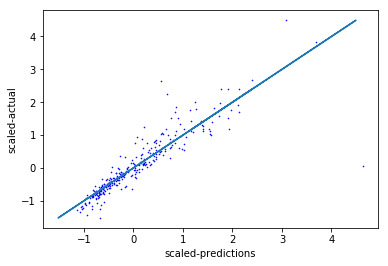

In [15]:
fig, ax = plt.subplots()
ax.plot(rf_preds, y_test, 'bo', markersize = 0.6)
ax.set(xlabel = 'scaled-predictions', ylabel = 'scaled-actual')
ax.plot(y_test, y_test)